In [6]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [3]:
# Cargar datos desde el archivo CSV
archivo_csv = '/content/Car details v3.csv'
datos = pd.read_csv(archivo_csv)
datos

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
# Ver las primeras filas y descripción del DataFrame
print(datos.head())
print(datos.describe())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

Text(0.5, 1.0, 'Datos faltantes y atípicos')

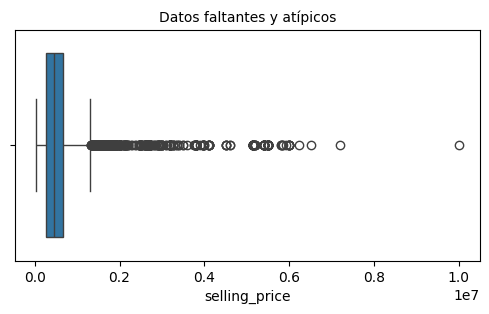

In [5]:
# Visualizar datos faltantes y atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['selling_price'])
plt.title('Datos faltantes y atípicos', fontsize=10)

In [7]:
# Dividir el dataset en Train y Test
X = datos[['year', 'km_driven', 'seats']]  # características relevantes seleccionadas
y = datos['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [9]:
# Entrenar el modelo de regresión lineal con los datos imputados
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

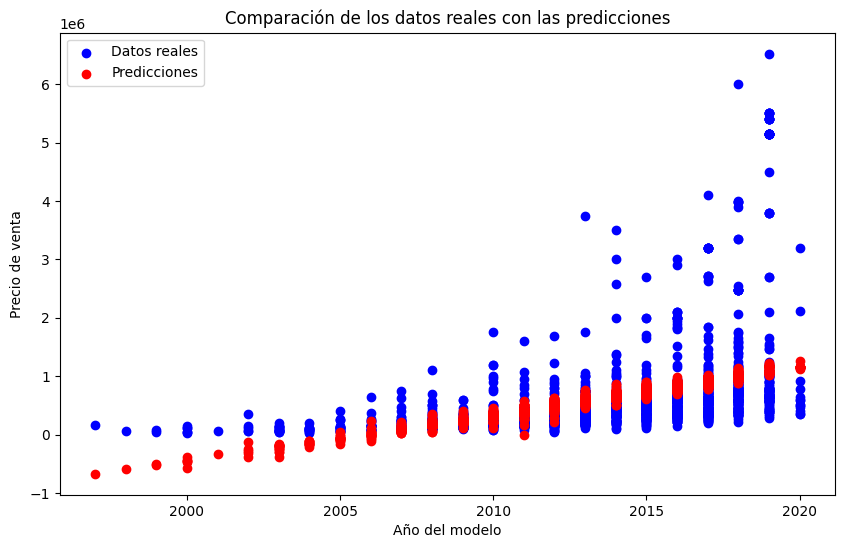

In [10]:
# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(X_test_imputed[:, 0], y_test, color='blue', label='Datos reales')
plt.scatter(X_test_imputed[:, 0], model.predict(X_test_imputed), color='red', label='Predicciones')
plt.xlabel('Año del modelo')
plt.ylabel('Precio de venta')
plt.title('Comparación de los datos reales con las predicciones')
plt.legend()
plt.show()


In [11]:
# Imputar valores faltantes en el conjunto de prueba
X_test_imputed = imputer.transform(X_test)

In [12]:
# Evaluar el modelo con los datos de prueba imputados
predictions = model.predict(X_test_imputed)
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 535911151950.367
R-squared: 0.1824197205664917


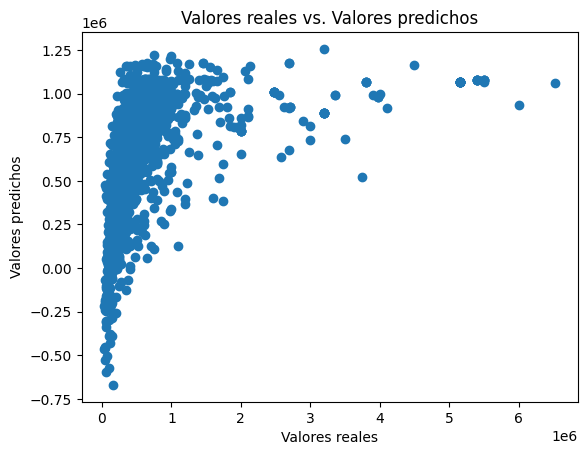

In [13]:
# Visualizar valores reales vs. valores predichos
plt.scatter(y_test, predictions)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs. Valores predichos")
plt.show()